In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
n_customers = 200

data = pd.DataFrame({
    'CustomerID': range(1, n_customers+1),
    'Gender': np.random.choice(['Male', 'Female'], size=n_customers),
    'Age': np.random.randint(18, 70, size=n_customers),
    'Annual Income (k$)': np.random.randint(15, 140, size=n_customers),
    'Spending Score (1-100)': np.random.randint(1, 100, size=n_customers)
})

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


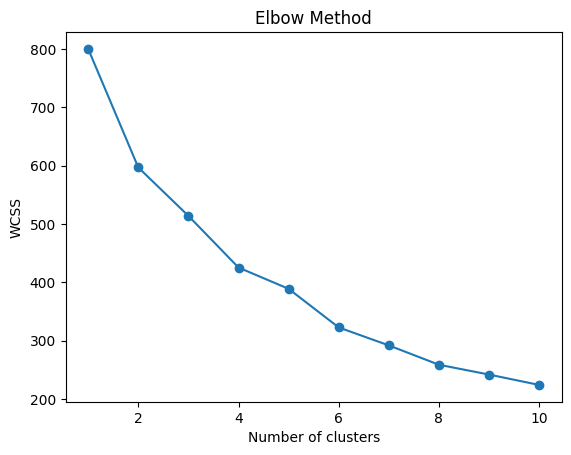

In [2]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [3]:

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

data['Cluster'] = y_kmeans


In [4]:

cluster_profile = data.groupby('Cluster').mean()
cluster_profile


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,94.655172,0.586207,24.758621,45.137931,69.413793
1,97.546875,1.000000,53.609375,68.187500,43.718750
2,106.051282,0.230769,33.128205,104.897436,21.948718
3,103.272727,0.000000,56.272727,63.227273,51.886364
4,101.333333,0.416667,40.166667,119.208333,83.750000


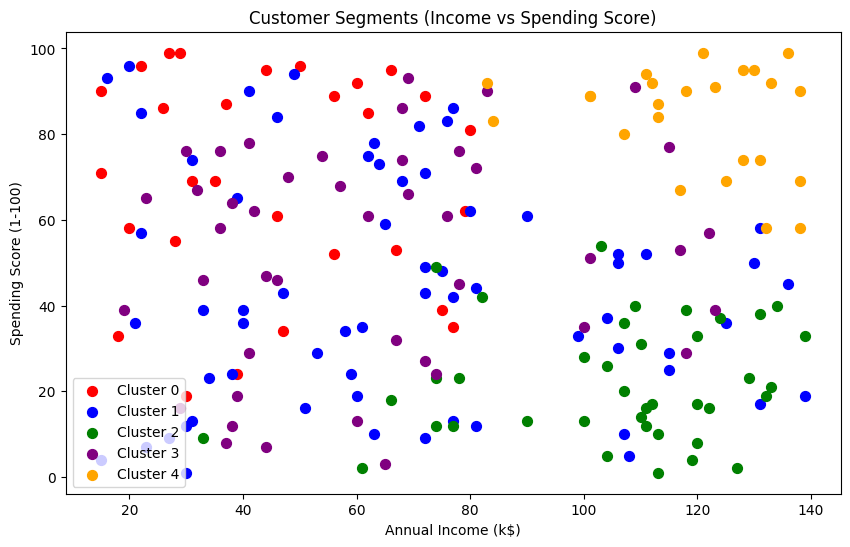

In [5]:
plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(5):
    cluster = data[data['Cluster'] == i]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'], 
                s=50, c=colors[i], label=f'Cluster {i}')

plt.title('Customer Segments (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
